<div style="text-align: center; font-size: 30px">DATA LOADING, CLEANING & EDA</div>

<div style="font-size: 20px; font-weight: bold">LOADING</div>

In [69]:
# Import libraries
import os
import numpy as np
import pandas as pd
import seaborn as sns

from glob import glob

import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython.display as ipd
from scipy.stats import skew, kurtosis
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [13]:
# Load df
df = pd.read_csv("audio_features.csv")

<div style="font-size: 20px; font-weight: bold">EDA</div>

# df overview
df.info()
df.head()

In [18]:
# Summary stats
df.describe()

,rms_mean,rms_std,rms_max,rms_min,rms_skew,rms_kurtosis,zcr_mean,zcr_std,zcr_max,zcr_min,...,chroma_cqt10_min,chroma_cqt10_max,chroma_cqt10_skew,chroma_cqt10_kurtosis,chroma_cqt11_mean,chroma_cqt11_std,chroma_cqt11_min,chroma_cqt11_max,chroma_cqt11_skew,chroma_cqt11_kurtosis
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,...,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,0.130826,0.048341,0.277283,0.029303,0.410728,0.250139,0.103651,0.049398,0.365906,0.019750,...,0.080697,0.988292,0.749781,0.586699,0.441094,0.216899,0.080038,0.987072,0.770240,0.564101
std,0.065671,0.026745,0.123934,0.029720,0.621539,1.707869,0.041824,0.023428,0.165245,0.015762,...,0.060514,0.058232,0.720462,2.314246,0.146824,0.054251,0.057162,0.057433,0.692290,2.075125
min,0.005270,0.002070,0.019861,0.000000,-3.125646,-1.499318,0.021697,0.006640,0.057129,0.000000,...,0.001541,0.378045,-3.877765,-1.783513,0.089949,0.061511,0.003035,0.453878,-1.613796,-1.753159
25%,0.086566,0.030666,0.190635,0.008365,0.042112,-0.552916,0.070374,0.032881,0.234375,0.008301,...,0.035398,1.000000,0.275507,-0.726013,0.336745,0.177367,0.035142,1.000000,0.323311,-0.716943
50%,0.122181,0.042685,0.261332,0.020009,0.364577,-0.212433,0.099503,0.044971,0.341797,0.015137,...,0.064195,1.000000,0.711945,-0.107527,0.436372,0.212516,0.066264,1.000000,0.743062,-0.022400
75%,0.175621,0.059867,0.347751,0.040391,0.732317,0.437810,0.132097,0.060245,0.474365,0.025879,...,0.109712,1.000000,1.143387,1.061000,0.542602,0.254985,0.110918,1.000000,1.154001,1.122752
max,0.397734,0.166446,0.678699,0.169621,3.318174,17.019512,0.274631,0.169465,0.849609,0.103516,...,0.430860,1.000000,4.007082,21.401882,0.863262,0.386737,0.328409,1.000000,3.770387,18.051289


<div style="font-size: 20px; font-weight: bold">Univariate Analysis</div>

In [19]:
# Check value_counts of categorical values
df["label"].value_counts()

label
classical    100
blues        100
country      100
disco        100
hiphop       100
metal        100
reggae       100
pop          100
rock         100
jazz          99
Name: count, dtype: int64

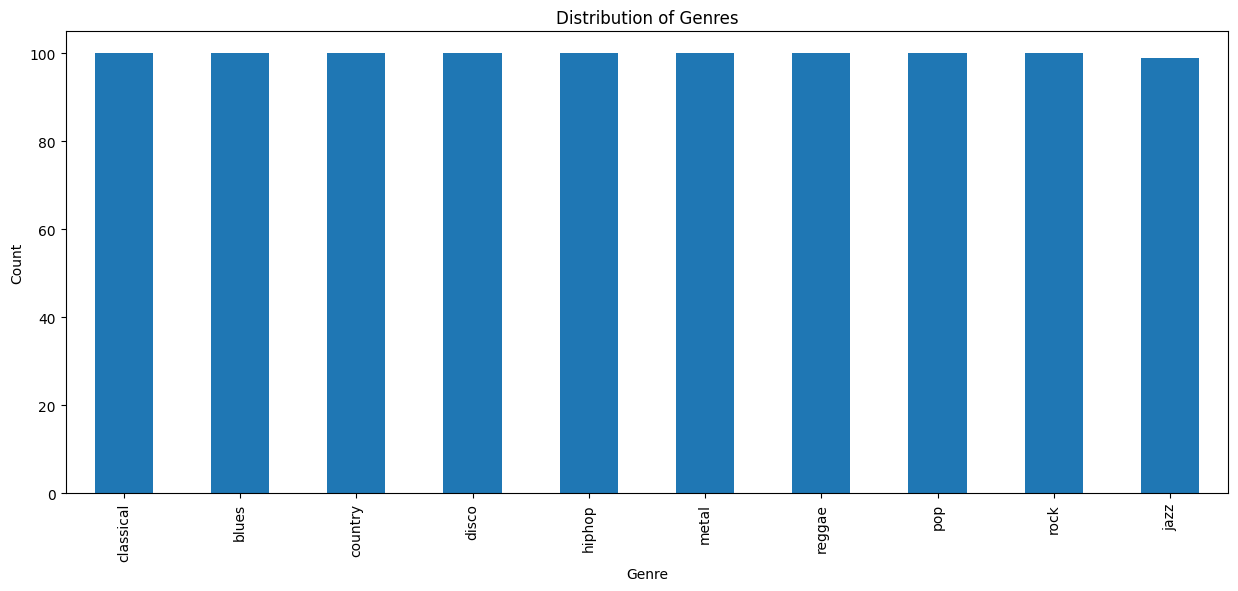

In [32]:
# Plot distribution of target
df["label"].value_counts().plot(kind="bar", figsize=(15, 6))
plt.xlabel("Genre")
plt.ylabel("Count")
plt.title("Distribution of Genres");

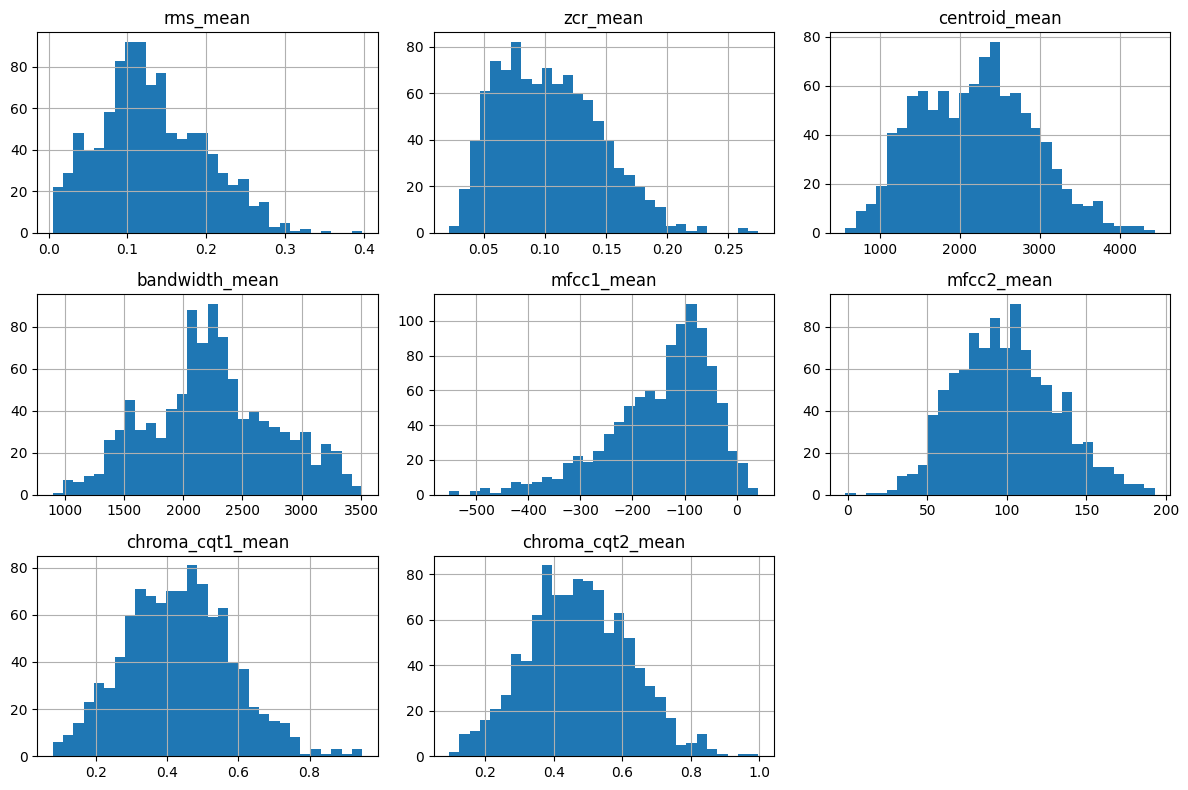

In [65]:
# Visualize a few features
features = ['rms_mean', 'zcr_mean', 'centroid_mean', 'bandwidth_mean', 'mfcc1_mean', 'mfcc2_mean', "chroma_cqt1_mean", "chroma_cqt2_mean"]

# Plot histograms
df[features].hist(bins=30, figsize=(12, 8))
plt.tight_layout()
plt.show()

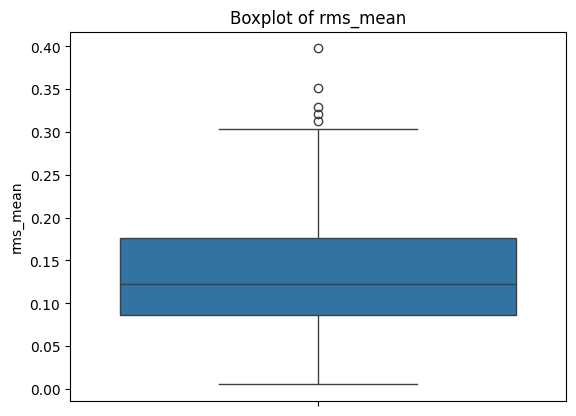

In [38]:
# Boxplot of rms_mean
sns.boxplot(df["rms_mean"])
plt.title("Boxplot of rms_mean")
plt.show()

/tmp/ipykernel_14809/3266588326.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="label", y="rms_mean", data=df, palette="Set2", legend=False)


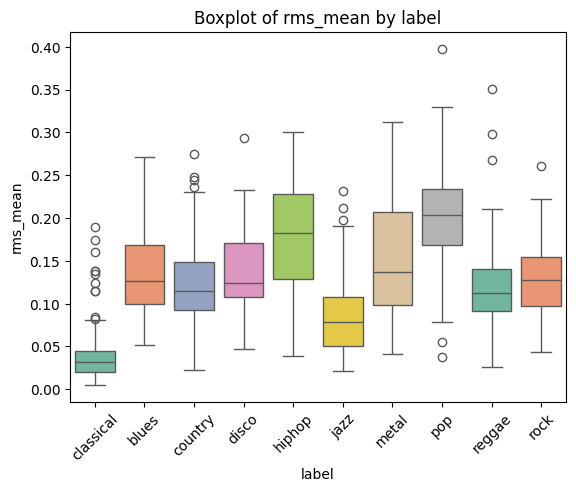

In [48]:
# Boxplot of feature vs target label
sns.boxplot(x="label", y="rms_mean", data=df, palette="Set2", legend=False)
plt.title("Boxplot of rms_mean by label")
plt.xticks(rotation=45)
plt.show()

/tmp/ipykernel_14809/1468942523.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="label", y="centroid_mean", data=df, palette="Set2", legend=False)


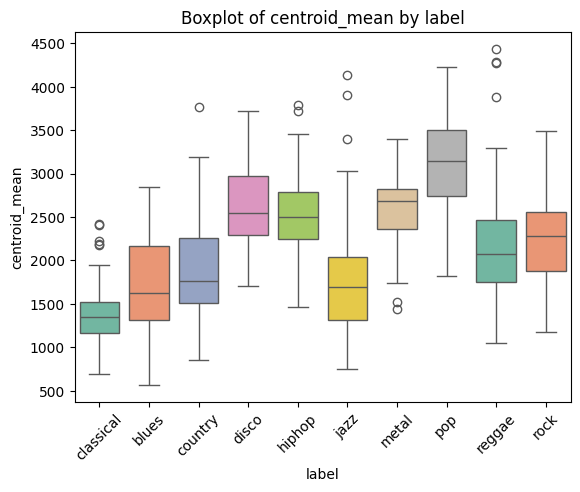

In [62]:
# Boxplot of feature vs target label
sns.boxplot(x="label", y="centroid_mean", data=df, palette="Set2", legend=False)
plt.title("Boxplot of centroid_mean by label")
plt.xticks(rotation=45)
plt.show()

/tmp/ipykernel_14809/3750018835.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="label", y="mfcc1_mean", data=df, palette="Set2", legend=False)


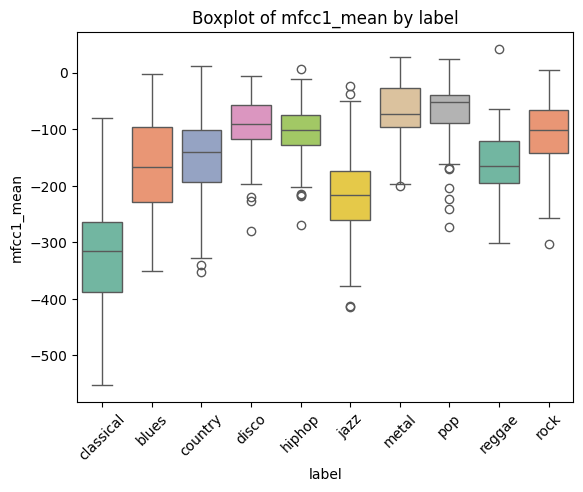

In [63]:
# Boxplot of feature vs target label
sns.boxplot(x="label", y="mfcc1_mean", data=df, palette="Set2", legend=False)
plt.title("Boxplot of mfcc1_mean by label")
plt.xticks(rotation=45)
plt.show()

/tmp/ipykernel_14809/794332449.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="label", y="chroma_cqt2_mean", data=df, palette="Set2", legend=False)


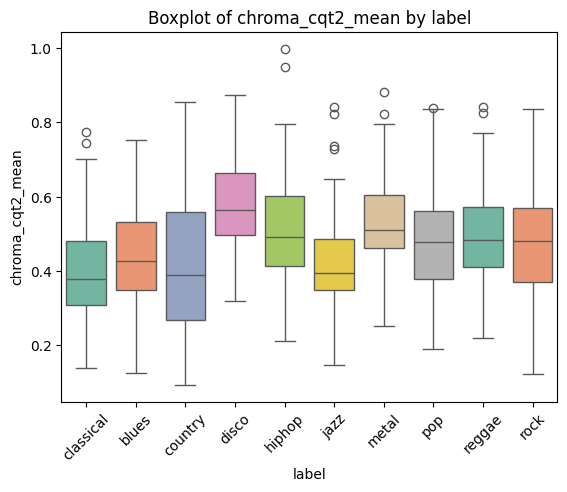

In [66]:
# Boxplot of feature vs target label
sns.boxplot(x="label", y="chroma_cqt2_mean", data=df, palette="Set2", legend=False)
plt.title("Boxplot of chroma_cqt2_mean by label")
plt.xticks(rotation=45)
plt.show()

In [49]:
# Summary statistics
df[features].describe()

,rms_mean,zcr_mean,centroid_mean,bandwidth_mean,mfcc1_mean,mfcc2_mean
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,0.130826,0.103651,2202.419119,2242.763943,-144.530189,99.531221
std,0.065671,0.041824,716.076969,526.517009,100.263519,31.331607
min,0.005270,0.021697,570.349904,900.409298,-552.158600,-1.471577
25%,0.086566,0.070374,1626.527014,1907.133128,-200.912970,76.771480
50%,0.122181,0.099503,2209.486740,2221.373053,-120.349420,98.435830
75%,0.175621,0.132097,2691.962733,2578.883006,-73.818312,119.790992
max,0.397734,0.274631,4435.732059,3509.656096,42.091450,193.074460


<div style="font-size: 20px; font-weight: bold">Multivariate Analysis</div>

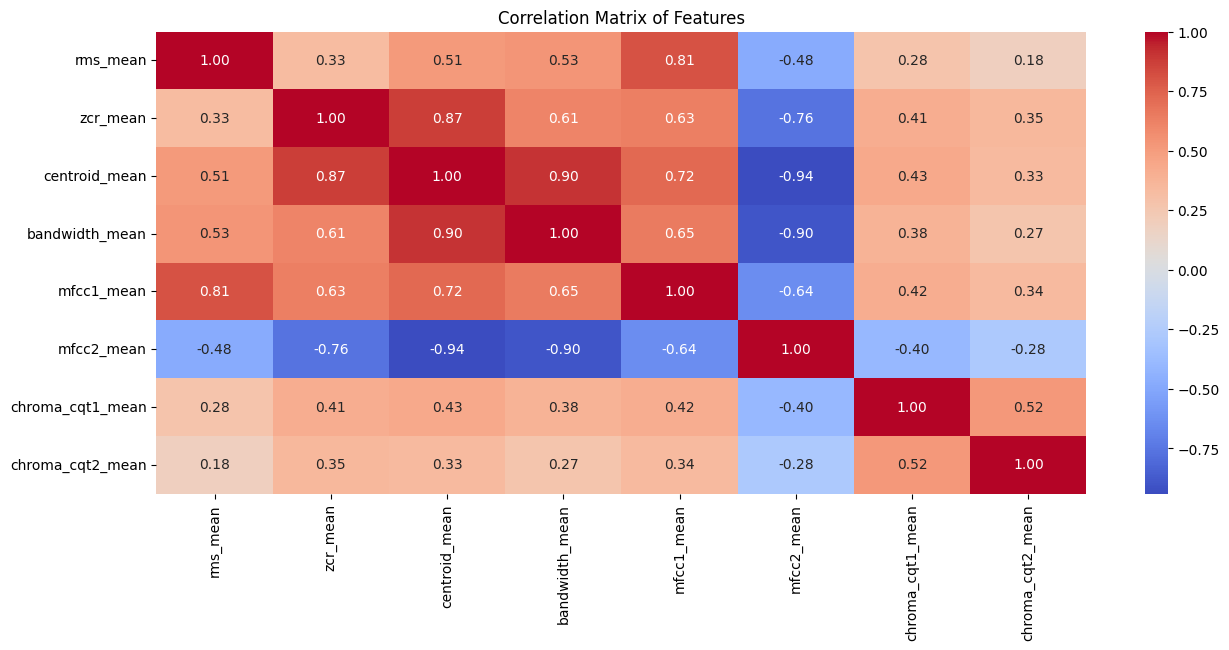

In [67]:
# Correlation matrix for numerical features
corr = df[features].corr()
# Plot heatmap
plt.figure(figsize=(15, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title("Correlation Matrix of Features")
plt.show()

In [70]:
# Perform a PCA
X = df.drop(columns=["filename", "label"], axis=1)
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Apply PCA
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)
# Check how many components retained
print(f"Before pca: {X.shape}")
print(f"After pca: {X_pca.shape}")

Before pca: (999, 222)
After pca: (999, 99)


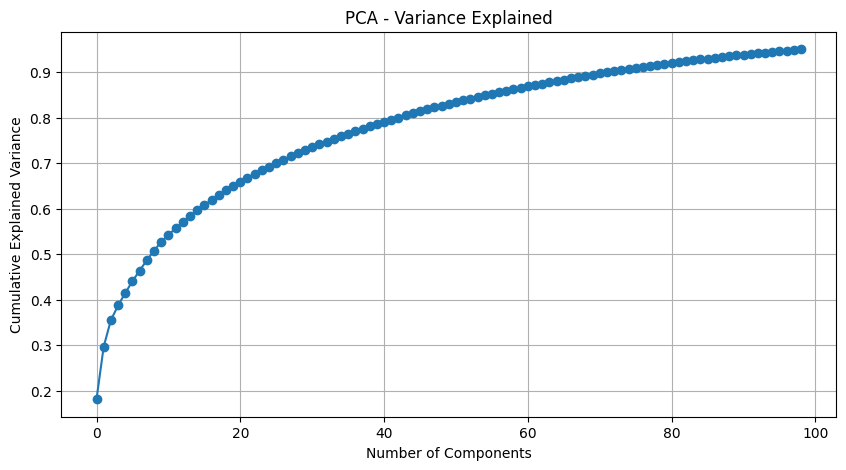

In [71]:
# Explained variance
plt.figure(figsize=(10, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Variance Explained')
plt.grid(True)
plt.show()

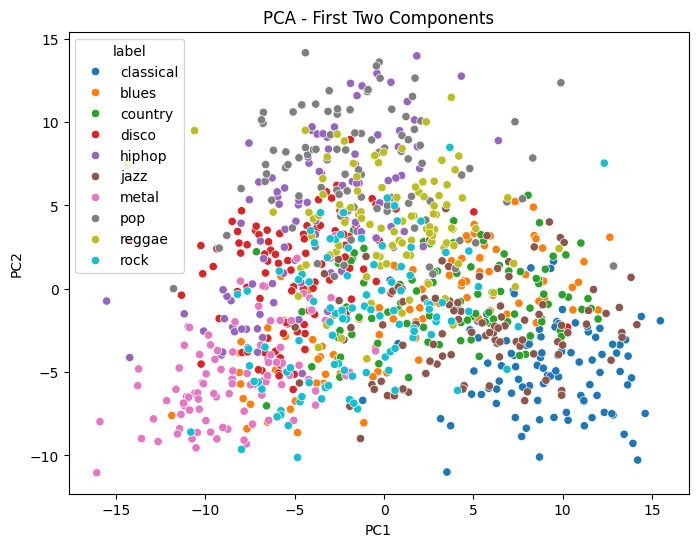

In [74]:
# Visualize first two principal components
pca_df = pd.DataFrame(X_pca[:, :2], columns=['PC1', 'PC2'])
pca_df['label'] = df['label']

plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='label', palette='tab10')
plt.title('PCA - First Two Components')
plt.show()

In [76]:
pca_df.head()

,PC1,PC2,label
0,9.943351,-3.763818,classical
1,9.155652,-5.192061,classical
2,7.984178,-3.395679,classical
3,8.760704,-4.126603,classical
4,8.578421,-4.590937,classical
